In [83]:
%load_ext autoreload
%autoreload 1
%aimport APDPkmeans
%aimport Fmeasure
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import random
import APDPkmeans
import Fmeasure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# Load Lifesci normalizated dataset
data = pd.read_csv('../dataset/Lifesci_normal.csv', header = None,sep=r'\s*,\s*',na_values="?",engine='python')
data = np.array(data)
n_sample, d_dimensional = data.shape
print(data)

[[0.68888242 0.72197529 0.60702913 ... 0.50702247 0.58492616 0.20862304]
 [0.50381808 0.75835296 0.64609493 ... 0.49797133 0.72163229 0.59462882]
 [0.98148226 0.55372899 0.57802178 ... 0.54834158 0.53515806 0.40975228]
 ...
 [0.64741646 0.65809335 0.49126835 ... 0.59004312 0.50631637 0.23389004]
 [0.74492172 0.77061816 0.69240589 ... 0.41130544 0.53015104 0.40869677]
 [0.64191891 0.78039175 0.73391141 ... 0.40707861 0.36814964 0.22764199]]


In [18]:
# sklearn k-means
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(data)
kmeans_sse=kmeans.inertia_
kmeans_clusters=kmeans.labels_
print('SSE:', kmeans_sse)

SSE: 4665.247501070619


<ipython-input-17-6ca828ca5fdd>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes(projection='3d')


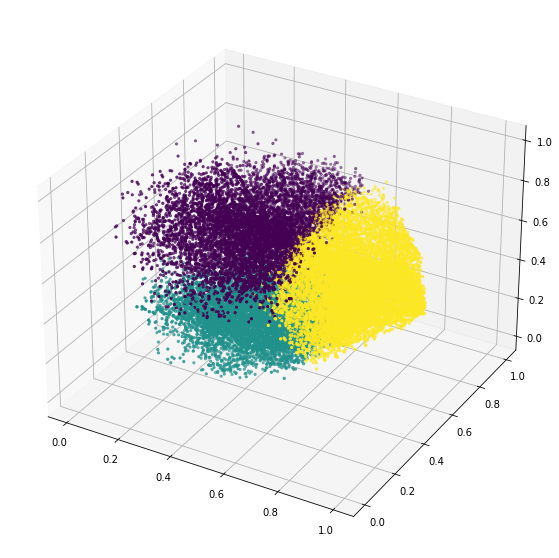

In [17]:
gif = plt.figure(figsize=(12,10))
plt.title("sklearn k-means cluster")
ax1 = plt.axes(projection='3d')
ax1.scatter3D(data[:, 0], data[:, 1], data[0:, 3],  marker='.', c=kmeans_clusters)
plt.show()

In [78]:
total_eps = [1, 1.5, 2, 3, 4, 5, 6]
total_sse = []
total_clusters = []
total_f_measure = []
for eps in total_eps:
    apdpkmeans = APDPkmeans.APDPkmeans(data, n_clusters = 3, eps = eps)
    apdpk_sse = []
    clusters = []
    f_measure = []
    for i in range(10):
        cluster, sse = apdpkmeans.fit(show = False)
        apdpk_sse.append(sse)
        clusters.append(cluster)
        f_measure.append(Fmeasure.fmeasure(kmeans_clusters, cluster, n_sample, 3))
        
    index = np.argmax(np.array(f_measure))
    current_clusters = clusters[index]
    total_clusters.append(current_clusters)
    total_f_measure.append(f_measure[index])
    total_sse.append(apdpk_sse[index])

total_eps =  1
Uniform:  [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
total_eps =  1.5
Uniform:  [0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15]
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
Training finished after 10 iterations!
total_eps =  2
AP:  [0.219      0.21477778 0.21055556 0.20633333 0.2021111

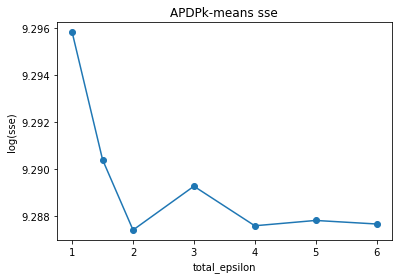

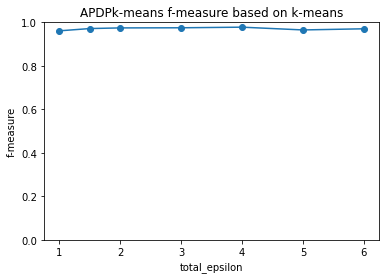

In [82]:
plt.figure()
plt.title("APDPk-means sse")
plt.xlabel('total_epsilon')
plt.ylabel('log(sse)')
plt.plot(total_eps, np.log(total_sse), marker = 'o')

plt.figure()
plt.title("APDPk-means f-measure based on k-means")
plt.xlabel('total_epsilon')
plt.ylabel('f-measure')
plt.ylim(0, 1)
plt.plot(total_eps, total_f_measure, marker = 'o')

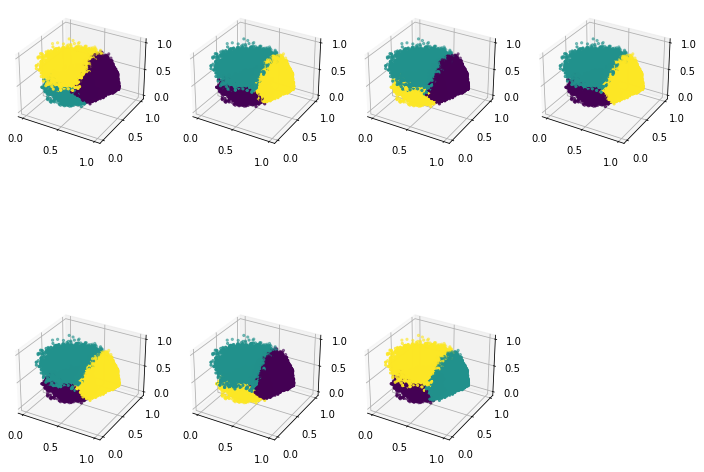

In [80]:
fig = plt.figure(figsize=(12,10))
count = 1
for clusters in total_clusters:
    ax = fig.add_subplot(2, 4, count, projection='3d')
    count += 1
    ax.scatter3D(data[:, 0], data[:, 1], data[0:, 3],  marker='.', c=clusters)
plt.show()